In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sys

In [21]:
if not '/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/datasets' in sys.path:
    sys.path.append('/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/datasets')

if not '/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/networks' in sys.path:
    sys.path.append('/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/networks')
sys.path

['',
 '/Users/mehmetbezcioglu/mjpro150',
 '/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/notebooks',
 '/Users/mehmetbezcioglu/miniconda3/envs/env352/lib/python35.zip',
 '/Users/mehmetbezcioglu/miniconda3/envs/env352/lib/python3.5',
 '/Users/mehmetbezcioglu/miniconda3/envs/env352/lib/python3.5/plat-darwin',
 '/Users/mehmetbezcioglu/miniconda3/envs/env352/lib/python3.5/lib-dynload',
 '/Users/mehmetbezcioglu/miniconda3/envs/env352/lib/python3.5/site-packages',
 '/Users/mehmetbezcioglu/miniconda3/envs/env352/lib/python3.5/site-packages/IPython/extensions',
 '/Users/mehmetbezcioglu/.ipython',
 '/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/datasets',
 '/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/models',
 '/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/networks']

In [22]:
import Siamese_Dataset_Loader as Dataset
from Convolutional_Siamese import *

In [4]:
data = Dataset.Loader(n_examples = 20, mode= "train_split",normalise = True)

KeyboardInterrupt: 

In [19]:
print("{}".format(data.X.shape))
print("{}".format(data.X_validation.shape))

np.random.seed(1)
print(np.random.randint(low=0, high= 964,size=10))

np.random.seed(2)
print(np.random.randint(low=0, high= 964,size=10))

(964, 18, 105, 105, 1)
(964, 2, 105, 105, 1)
[ 37 235 908  72 767 905 715 645 847 960]
[168 527 493 584 534 299 466  75 360 263]


In [4]:
val_data = Dataset.Loader(n_examples = 20, mode= None, path= "/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/datasets/images_evaluation",normalise = True)

6140
(307, 20, 105, 105, 1)


In [68]:
for _ in range(20):
    print(np.random.randint(low=0, high= val_data.X.shape[1],size=2))

[15 16]
[ 6 14]
[2 7]
[5 9]
[10 19]
[12  4]
[0 6]
[10 14]
[17  8]
[14  5]
[17 16]
[5 0]
[9 8]
[18 14]
[12  9]
[15  9]
[ 8 18]
[12  1]
[17  2]
[14  2]


In [65]:
test,train,labels = val_data.generateOneShotTrials(val_data.X,10)

Characters drawn:[153  65 268  53  54 280 277 178 149  48]
Drawers drawn:[ 9 11]


In [58]:
test,train,labels = data.generateOneShotTrials(data.X_validation,10)

Characters drawn:[686 839 691  64 126 945 540  30 175 353]
Drawers drawn:[0 1]


In [4]:
import cv2
img = cv2.imread("/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/testImage.pgm",0)
print(img.shape)

(112, 92)


In [8]:
img_resized = cv2.resize(img,(105,int(105*92/112)),cv2.INTER_AREA)
img_resized.shape

(86, 105)

In [10]:
cv2.imwrite('/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/img_resized.jpeg',img_resized)

True

In [26]:
img.reshape(img.shape[0],img.shape[1],1).shape

(112, 92, 1)

In [32]:

img_resized_tf = tf.image.resize_image_with_crop_or_pad(image=img.reshape(img.shape[0],img.shape[1],1), target_height = 105, target_width =105)
print(img_resized_tf.shape)
img_resized_tf
with tf.Session() as sess:
    img_ = sess.run(img_resized_tf)
img_.shape

(105, 105, 1)


(105, 105, 1)

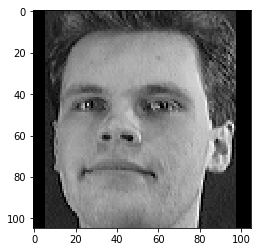

In [33]:
plt.imshow(img_.reshape(105,105),cmap='gray')
plt.show()

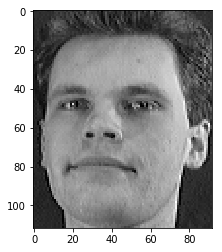

In [34]:
plt.imshow(img,cmap='gray')
plt.show()

In [84]:
import os
import cv2 

images = []
paths = []
for root, _, files in  os.walk("/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject"):
    for file in files:
        if ".pgm" in file:
            print(os.path.join(root,file))
            paths.append(os.path.join(root,file))
            images.append(cv2.imread(os.path.join(root,file),cv2.IMREAD_GRAYSCALE))

/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s34/7.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s34/6.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s34/4.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s34/5.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s34/1.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s34/2.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s34/3.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s34/8.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s34/9.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s34/10.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s33/7.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s33/6.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s33/4.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s33/5.pgm
/Users/mehmetbezcio

/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s37/7.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s37/6.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s37/4.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s37/5.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s37/1.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s37/2.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s37/3.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s37/8.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s37/9.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s37/10.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s7/7.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s7/6.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s7/4.pgm
/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/s7/5.pgm
/Users/mehmetbezcioglu/

In [87]:
images = np.asarray(images)
images.shape
images[0].shape

(112, 92)

In [88]:
image_placeholder = tf.placeholder(dtype=tf.float32,shape=(112,92,1))
img_resized_tf = tf.image.resize_image_with_crop_or_pad(image=image_placeholder, target_height = 105, target_width =105)
print(img_resized_tf.shape)
img_resized_tf
resized_images = []
with tf.Session() as sess:
    for image in images:
        resized_images.append(sess.run(img_resized_tf, feed_dict ={image_placeholder:image.reshape(112,92,1)}))

(105, 105, 1)


In [89]:
images.shape
resized_images = np.asarray(resized_images)
resized_images.shape

(400, 105, 105, 1)

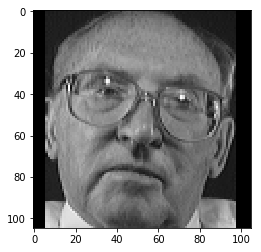

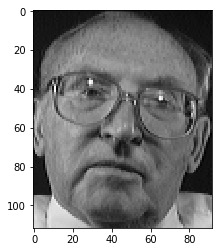

In [92]:
plt.imshow(resized_images[1].reshape(105,105),cmap='gray')
plt.show()
plt.imshow(images[1].reshape(112,92),cmap='gray')
plt.show()

In [11]:
plt.imshow(cv2.imread(paths[0],cv2.IMREAD_GRAYSCALE),cmap='gray')
plt.show()

NameError: name 'cv2' is not defined

In [94]:
for counter,image in enumerate(resized_images):
    cv2.imwrite(paths[counter],image)

In [4]:
orl_data = Dataset.Loader(n_examples= 10, mode=None, path = "/Users/mehmetbezcioglu/Documents/SEMESTER1/ThirdYearProject/", normalise=True)

400
(40, 10, 105, 105, 1)


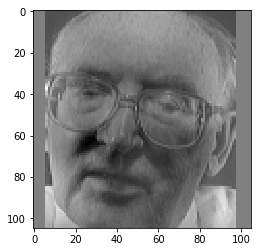

In [15]:
orl_data.X[0,0].shape

plt.imshow(orl_data.X[0,0].reshape(105,105),cmap='gray')
plt.show()

In [18]:
orl_test_imgs, orl_train_imgs, orl_labels = orl_data.generateOneShotTrials(orl_data.X,size=10)
print(orl_test_imgs.shape)
print(orl_train_imgs.shape)
print(orl_labels.shape)
orl_labels

(10, 105, 105, 1)
(10, 105, 105, 1)
(1, 10)


array([[39,  6,  9, 28, 10,  6, 24, 29, 32, 37]])

# Computing the one-shot accuracy for ORL

-  build the model
-  run the model on a training batch once to ensure that the weights are restored correctly.
-  then compute the one shot accuracy on orl dataset


In [33]:
train_data = Dataset.Loader(n_examples = 100,mode="None",path="/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/datasets/images_background",normalise=True)

96400
(964, 100, 105, 105, 1)


KeyboardInterrupt: 

In [ ]:
tf.reset_default_graph()
nn = Siamese()
nn.logits = nn.forward_prop()
nn.cost = nn.compute_cost()
saver = tf.train.Saver()
nn.accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.cast((tf.nn.sigmoid(nn.logits)>0.5),tf.float32),nn.Y),tf.float32))

with tf.Session() as sess:
    saver.restore(sess,"/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/pre_trained_weights/job_188_weights/conv_siamese_model_40.ckpt")
    training_batch = train_data.get_training_pairs(batch_size= 128, drawer_size= 2, seed=1)
    epoch_acc = 0
    epoch_loss = 0
    for counter, batch in enumerate(training_batch):
        # print("In batch:{}".format(counter))
        X1 = batch[0]
        X2 = batch[1]
        Y  = batch[2]
        _, c, a= sess.run([CNN.cost,CNN.accuracy], feed_dict={
            nn.X:  X1,
            nn.X2: X2,
            nn.Y:  Y,
        })
        epoch_acc += (a/len(training_batch))
        epoch_loss += (c/ len(training_batch))

In [62]:
 hyperparameters = [
                        0.1,
                        0.1,
                        0.1,
                        0.1,
                        0.1,
                        0.1,
                        0.1,
                        0.1,
                        0.1,
                        0.1,
                        0.1,
                        99
              ]

In [44]:
for epoch in range(20):
    hyperparameters = np.asarray(hyperparameters)
    learning_rates = hyperparameters[:6] * (0.99**epoch)
    momentums = hyperparameters[6:] * (1.01**epoch)
print("learning_rates:{}\nmomentums:{}".format(learning_rates,momentums))

learning_rates:[0.08261686 0.08261686 0.08261686 0.08261686 0.08261686 0.08261686]
momentums:[0.1208109 0.1208109 0.1208109 0.1208109 0.1208109 0.1208109]


In [47]:
x = tf.placeholder(dtype=tf.float32,shape=[])
x = 2

In [52]:
hyperparameters

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [63]:
h = hyperparameters[:6]
h2= hyperparameters[6:]
h + h2

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 99]

In [68]:
a = np.asarray(hyperparameters)[:6] * 0.1
b = np.asarray(hyperparameters)[6:] * 10

In [81]:
c  = np.concatenate((a,b)).reshape(12,1)

In [82]:
c

array([[1.0e-02],
       [1.0e-02],
       [1.0e-02],
       [1.0e-02],
       [1.0e-02],
       [1.0e-02],
       [1.0e+00],
       [1.0e+00],
       [1.0e+00],
       [1.0e+00],
       [1.0e+00],
       [9.9e+02]])

In [88]:
l = []
l = c[:6]
x = l[0]

In [90]:
x[0]

0.010000000000000002